In [ ]:
import pandas as pd                 # Manipular os dados
import os                           # Gerenciar arquivos no sistema operacional
import matplotlib.pyplot as plt     # Biblioteca para geração de gráficos
import seaborn as sns               # Biblioteca para gerar gráficos estilizados

## Importando as vendas

In [ ]:
# Criar variável para armazenar o caminho do diretório com os arquivos
dir_path = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\desafio-super-atacadista\\vendas\\'

# Criar uma lista vazia para armazenar os caminhos completos
res = []

#
for path in os.listdir(dir_path):
    # Verificar se é um arquivo válido
    if os.path.isfile(dir_path + path):
        res.append(dir_path + path)

# Criar um dataframe vazio
vendas = pd.DataFrame()

# Estrutura para combinar os arquivos
for file in res:
    df1 = pd.read_excel(file)
    vendas = pd.concat([vendas,df1])

dir_final = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\desafio-super-atacadista\\vendas-consolidado\\'
fileName = 'ArquivoCombinado.xlsx'

vendas.to_excel(dir_final + fileName)

In [ ]:
# Tabela fato - Responsável por gerar os valores de análise
vendas.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40


## Importando as tabelas dimensões (DE-PARA)

In [ ]:
# Tabela fato - Responsável por gerar os valores de análise
vendas.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40


In [ ]:
# Carregar a tabela Clientes

path = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\desafio-super-atacadista\\'
file = 'Dimensões.xlsx'

dfClientes = pd.read_excel(path + file, sheet_name='Cliente')

dfClientes.head()

,cdCliente,Razão Social,Status,Categoria,Cidade,UF
0,1339104,Vinicius e Filipe Cantina ME,A,Cantinas,Curitiba,PR
1,1339740,Sandra e Cláudio Cantina Ltda,A,Cantinas,Curitiba,PR
2,1339884,Vera e Analu Cantina ME,A,Cantinas,Curitiba,PR
3,1340322,Emilly e Vitor Cantina Ltda,A,Cantinas,Curitiba,PR
4,4837795,Kaique e Rafaela Cantina ME,A,Cantinas,Curitiba,PR


In [ ]:
# Carregar a tabela Produtos

path = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\desafio-super-atacadista\\'
file = 'Dimensões.xlsx'

dfProdutos = pd.read_excel(path + file, sheet_name='Produto')

dfProdutos.head()

,cdProduto,Descrição,cdGrupo
0,1,Produto 1,9999
1,2,Produto 2,9999
2,3,Produto 3,9999
3,4,Produto 4,9999
4,5,Produto 5,9999


In [ ]:
# Carregar a tabela Grupo Produto

path = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\desafio-super-atacadista\\'
file = 'Dimensões.xlsx'

dfGrupoProd = pd.read_excel(path + file, sheet_name='GrupoProduto')

dfGrupoProd.head()

,cdGrupo,Grupo,Linha
0,102,Leite em Pó,Alimentos
1,103,Açúcares,Alimentos
2,104,Doces Enlatados,Alimentos
3,105,Farinhas,Alimentos
4,106,Óleos,Alimentos


In [ ]:
# Carregar a tabela Clientes

path = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\desafio-super-atacadista\\'
file = 'Dimensões.xlsx'

dfVendedores = pd.read_excel(path + file, sheet_name='Vendedor')

dfVendedores.head()

,cdVendedor,Vendedor,cdSupervisor,Supervisor,cdGerente,Gerente,Equipe
0,669,Kaua Araujo,15,Fernando Silva,1,Victor Castro,Varejo
1,660,Julieta Gomes,25,Emily Rocha,1,Victor Castro,Varejo
2,183,Isabella Sousa,25,Emily Rocha,1,Victor Castro,Varejo
3,102,Gustavo Barros,25,Emily Rocha,1,Victor Castro,Varejo
4,196,Leonardo Cardoso,30,Diego Araujo,1,Victor Castro,Varejo


In [ ]:
# Carregar a tabela Data

path = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\desafio-super-atacadista\\'
file = 'Dimensões.xlsx'

dfData = pd.read_excel(path + file, sheet_name='Data')

dfData.head()

,Data,Ano,Mes,MesNum,Dia
0,2017-01-01,2017,Janeiro,1,1
1,2017-01-02,2017,Janeiro,1,2
2,2017-01-03,2017,Janeiro,1,3
3,2017-01-04,2017,Janeiro,1,4
4,2017-01-05,2017,Janeiro,1,5


## Tratando o dataframe Metas

In [ ]:
caminho = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\desafio-super-atacadista\\'
arquivo = 'Metas.xlsx'
meta = pd.read_excel(caminho + arquivo, sheet_name='Metas')

In [ ]:
meta.head()

,Unnamed: 0,Metas por Vendedor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,NaN,Última Atualização: 31/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,cdVendedor,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
4,NaN,102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,...,98801,72820,62828,23732,59726,72648,90886,33627,22575,147200


In [ ]:
meta = meta.iloc[3:,1:]

In [ ]:
meta.head()

,Metas por Vendedor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
3,cdVendedor,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
4,102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,...,98801,72820,62828,23732,59726,72648,90886,33627,22575,147200
5,125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,...,102588,111966,73820,63180,91574,147501,27211,35545,24405,95060
6,144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,...,34363,84436,107508,122783,63397,91962,96559,86822,93434,21425
7,194,0,0,0,0,0,0,0,0,0,...,143281,145669,107315,121999,87128,51302,73211,49920,99219,82882


In [ ]:
meta_lista = meta.head(1)

In [ ]:
meta_lista

,Metas por Vendedor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
3,cdVendedor,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00


In [ ]:
meta_lista.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 3 to 3
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Metas por Vendedor  1 non-null      object
 1   Unnamed: 2          1 non-null      object
 2   Unnamed: 3          1 non-null      object
 3   Unnamed: 4          1 non-null      object
 4   Unnamed: 5          1 non-null      object
 5   Unnamed: 6          1 non-null      object
 6   Unnamed: 7          1 non-null      object
 7   Unnamed: 8          1 non-null      object
 8   Unnamed: 9          1 non-null      object
 9   Unnamed: 10         1 non-null      object
 10  Unnamed: 11         1 non-null      object
 11  Unnamed: 12         1 non-null      object
 12  Unnamed: 13         1 non-null      object
 13  Unnamed: 14         1 non-null      object
 14  Unnamed: 15         1 non-null      object
 15  Unnamed: 16         1 non-null      object
 16  Unnamed: 17         1 non-null

In [ ]:
lista = meta_lista.values.tolist()

In [ ]:
lista = lista[0]

In [ ]:
type(lista)

list

In [ ]:
len(lista)

73

In [ ]:
meta.columns = [lista]

In [ ]:
meta.head()

,cdVendedor,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
3,cdVendedor,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
4,102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,...,98801,72820,62828,23732,59726,72648,90886,33627,22575,147200
5,125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,...,102588,111966,73820,63180,91574,147501,27211,35545,24405,95060
6,144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,...,34363,84436,107508,122783,63397,91962,96559,86822,93434,21425
7,194,0,0,0,0,0,0,0,0,0,...,143281,145669,107315,121999,87128,51302,73211,49920,99219,82882


In [ ]:
meta = meta.iloc[1:,:]

In [ ]:
meta.head()

,cdVendedor,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
4,102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,...,98801,72820,62828,23732,59726,72648,90886,33627,22575,147200
5,125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,...,102588,111966,73820,63180,91574,147501,27211,35545,24405,95060
6,144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,...,34363,84436,107508,122783,63397,91962,96559,86822,93434,21425
7,194,0,0,0,0,0,0,0,0,0,...,143281,145669,107315,121999,87128,51302,73211,49920,99219,82882
8,196,75253.91149,56094.071733,156709.108284,82723.073158,47426.320283,66398.220086,91840.461612,136680.893152,87425.550099,...,121938,29782,100255,113866,116867,135246,88283,81605,20216,107324


In [ ]:
meta = meta.transpose()

In [ ]:
meta.head()

,4,5,6,7,8,9,10,11,12,13,14
cdVendedor,102,125,144,194,196,215,265,285,326,660,669
2017-01-01 00:00:00,140768.312981,21525.584613,72301.437981,0,75253.91149,286012.89817,122199.726847,0,0,0,0
2017-02-01 00:00:00,124258.753484,50778.518843,47360.51627,0,56094.071733,268739.946775,147007.556793,0,0,0,0
2017-03-01 00:00:00,169509.931262,80286.310022,54145.357333,0,156709.108284,329813.357769,127262.128128,0,0,0,0
2017-04-01 00:00:00,143465.231352,117769.05503,89457.661634,0,82723.073158,159143.4362,206980.493152,0,0,0,0


In [ ]:
meta = meta.rename_axis('Index').reset_index()

In [ ]:
meta.head()

,Index,4,5,6,7,8,9,10,11,12,13,14
0,cdVendedor,102,125,144,194,196,215,265,285,326,660,669
1,2017-01-01 00:00:00,140768.312981,21525.584613,72301.437981,0,75253.91149,286012.89817,122199.726847,0,0,0,0
2,2017-02-01 00:00:00,124258.753484,50778.518843,47360.51627,0,56094.071733,268739.946775,147007.556793,0,0,0,0
3,2017-03-01 00:00:00,169509.931262,80286.310022,54145.357333,0,156709.108284,329813.357769,127262.128128,0,0,0,0
4,2017-04-01 00:00:00,143465.231352,117769.05503,89457.661634,0,82723.073158,159143.4362,206980.493152,0,0,0,0


In [ ]:
meta_lista = meta.head(1)

In [ ]:
meta_lista

,Index,4,5,6,7,8,9,10,11,12,13,14
0,cdVendedor,102,125,144,194,196,215,265,285,326,660,669


In [ ]:
meta_lista.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   1 non-null      object
 1   4       1 non-null      object
 2   5       1 non-null      object
 3   6       1 non-null      object
 4   7       1 non-null      object
 5   8       1 non-null      object
 6   9       1 non-null      object
 7   10      1 non-null      object
 8   11      1 non-null      object
 9   12      1 non-null      object
 10  13      1 non-null      object
 11  14      1 non-null      object
dtypes: object(12)
memory usage: 224.0+ bytes


In [ ]:
lista_2 = meta_lista.values.tolist()

In [ ]:
lista_2

[['cdVendedor', 102, 125, 144, 194, 196, 215, 265, 285, 326, 660, 669]]

In [ ]:
lista_2 = lista_2[0]

In [ ]:
len(lista_2)

12

In [ ]:
meta.columns = [lista_2]

In [ ]:
meta.head()

,cdVendedor,102,125,144,194,196,215,265,285,326,660,669
0,cdVendedor,102,125,144,194,196,215,265,285,326,660,669
1,2017-01-01 00:00:00,140768.312981,21525.584613,72301.437981,0,75253.91149,286012.89817,122199.726847,0,0,0,0
2,2017-02-01 00:00:00,124258.753484,50778.518843,47360.51627,0,56094.071733,268739.946775,147007.556793,0,0,0,0
3,2017-03-01 00:00:00,169509.931262,80286.310022,54145.357333,0,156709.108284,329813.357769,127262.128128,0,0,0,0
4,2017-04-01 00:00:00,143465.231352,117769.05503,89457.661634,0,82723.073158,159143.4362,206980.493152,0,0,0,0


In [ ]:
meta.rename(columns = {'cdVendedor':'DataVenda'}, inplace = True)

In [ ]:
meta.head()

,DataVenda,102,125,144,194,196,215,265,285,326,660,669
0,cdVendedor,102,125,144,194,196,215,265,285,326,660,669
1,2017-01-01 00:00:00,140768.312981,21525.584613,72301.437981,0,75253.91149,286012.89817,122199.726847,0,0,0,0
2,2017-02-01 00:00:00,124258.753484,50778.518843,47360.51627,0,56094.071733,268739.946775,147007.556793,0,0,0,0
3,2017-03-01 00:00:00,169509.931262,80286.310022,54145.357333,0,156709.108284,329813.357769,127262.128128,0,0,0,0
4,2017-04-01 00:00:00,143465.231352,117769.05503,89457.661634,0,82723.073158,159143.4362,206980.493152,0,0,0,0


In [ ]:
meta = meta.iloc[1:,:]

In [ ]:
meta.head()

,DataVenda,102,125,144,194,196,215,265,285,326,660,669
1,2017-01-01 00:00:00,140768.312981,21525.584613,72301.437981,0,75253.91149,286012.89817,122199.726847,0,0,0,0
2,2017-02-01 00:00:00,124258.753484,50778.518843,47360.51627,0,56094.071733,268739.946775,147007.556793,0,0,0,0
3,2017-03-01 00:00:00,169509.931262,80286.310022,54145.357333,0,156709.108284,329813.357769,127262.128128,0,0,0,0
4,2017-04-01 00:00:00,143465.231352,117769.05503,89457.661634,0,82723.073158,159143.4362,206980.493152,0,0,0,0
5,2017-05-01 00:00:00,98423.627768,162043.205771,115437.266528,0,47426.320283,117572.134697,119509.500049,0,0,0,0


In [ ]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 1 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   (DataVenda,)  72 non-null     object
 1   (102,)        72 non-null     object
 2   (125,)        72 non-null     object
 3   (144,)        72 non-null     object
 4   (194,)        72 non-null     object
 5   (196,)        72 non-null     object
 6   (215,)        72 non-null     object
 7   (265,)        72 non-null     object
 8   (285,)        72 non-null     object
 9   (326,)        72 non-null     object
 10  (660,)        72 non-null     object
 11  (669,)        72 non-null     object
dtypes: object(12)
memory usage: 6.9+ KB


In [ ]:
meta.reset_index(inplace=True)
meta= meta.iloc[:,1:]


In [ ]:
meta.head()

,DataVenda,102,125,144,194,196,215,265,285,326,660,669
0,2017-01-01 00:00:00,140768.312981,21525.584613,72301.437981,0,75253.91149,286012.89817,122199.726847,0,0,0,0
1,2017-02-01 00:00:00,124258.753484,50778.518843,47360.51627,0,56094.071733,268739.946775,147007.556793,0,0,0,0
2,2017-03-01 00:00:00,169509.931262,80286.310022,54145.357333,0,156709.108284,329813.357769,127262.128128,0,0,0,0
3,2017-04-01 00:00:00,143465.231352,117769.05503,89457.661634,0,82723.073158,159143.4362,206980.493152,0,0,0,0
4,2017-05-01 00:00:00,98423.627768,162043.205771,115437.266528,0,47426.320283,117572.134697,119509.500049,0,0,0,0


Questão 02 - Qual a cobertura de clientes por ano

In [ ]:
# Bloco utilizado para combinar as colunas ANO, Mês, Dia e MesNum do dataframe
# dfData, para que seja possível agregar os dados de modo a visualizar as informações
# por ano.

df_merge = vendas.merge(dfData, # Tabela da direita (fornecedora das colunas faltantes)
                               left_on='DataEmissao', # Coluna que será utilizada como valor procaurado na tabela esq.
                               right_on='Data', # Coluna da tabela da direita que será utilizada para busca
                               how='left' # É a forma que os dados serão inseridos, ESQUERDA <--- DIRETA
                               )

df_merge.head(2)

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.6,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.4,2017-01-12,2017,Janeiro,1,12


In [ ]:
# Cria um novo dataframe, considerando apenas as colunas ANO e cdCliente do df_merge
df_contagem_cliente = df_merge.loc[:,['Ano','cdCliente']]

In [ ]:
# Cria um novo dataframe, considerando apenas as colunas ANO e cdCliente do df_merge
df_contagem_cliente.head()

,Ano,cdCliente
0,2017,3140218
1,2017,3140218
2,2017,3140218
3,2017,2983332
4,2017,2983332


In [ ]:
# Remover a duplicada para calcular a cobertura de clientes
# Sendo que para este cálculo é necessário eliminar os registros
# Duplicados, considera todas as colunas

df_contagem_cliente= df_contagem_cliente.drop_duplicates()

In [ ]:
df_contagem_cliente.head()

,Ano,cdCliente
0,2017,3140218
3,2017,2983332
7,2017,4623768
23,2017,3363854
25,2017,671829


In [ ]:
# Agrupa os dados, por meio de contagem, separando os dados
# através da coluna ANO
df_contagem_cliente = df_contagem_cliente.groupby(['Ano']).count()



In [ ]:
df_contagem_cliente.head()

,cdCliente
Ano,
2017,599
2018,1232
2019,980
2020,980
2021,980


In [ ]:
df_contagem_cliente.rename(columns={'cdCliente':'Quantidade de clientes'}, inplace=True)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Ano', ylabel='Quantidade de clientes'>

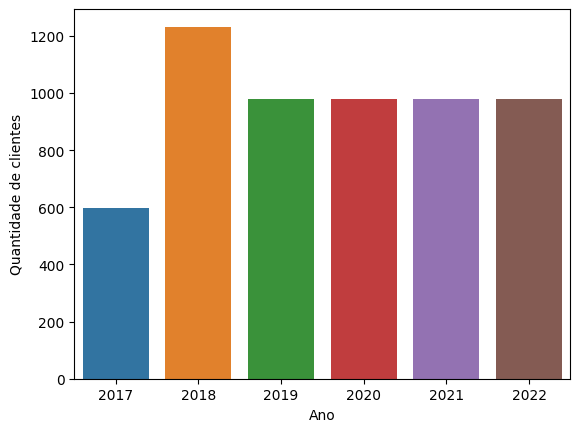

In [ ]:
sns.barplot(
            x = df_contagem_cliente.index,
            y ='Quantidade de clientes',
            data = df_contagem_cliente
            )

## 3. Peso líquido total vendidos por ano?

In [ ]:
df_merge.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,2017-01-12,2017,Janeiro,1,12
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,2017-01-12,2017,Janeiro,1,12
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,2017-01-13,2017,Janeiro,1,13
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,2017-01-13,2017,Janeiro,1,13


In [ ]:
# Criando um novo DataFrame com as colunas Ano e Peso Líquido

df_peso_ano = df_merge.loc[:,['Ano','Peso Líquido']]
df_peso_ano.head()

,Ano,Peso Líquido
0,2017,0.60
1,2017,5.40
2,2017,1.92
3,2017,1.26
4,2017,1.40


In [ ]:
# Realizando o group by para depois fazer a soma
df_peso_ano = df_peso_ano.groupby('Ano').sum()
df_peso_ano.head()

,Peso Líquido
Ano,
2017,414819.40
2018,658505.01
2019,61465.62
2020,61465.62
2021,61465.62


In [ ]:
df_peso_ano['Peso_tons'] = df_peso_ano['Peso Líquido']/1000

In [ ]:
df_peso_ano.head()

,Peso Líquido,Peso_tons
Ano,,
2017,414819.40,414.81940
2018,658505.01,658.50501
2019,61465.62,61.46562
2020,61465.62,61.46562
2021,61465.62,61.46562


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '414.819'),
 Text(0, 0, '658.505'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656')]

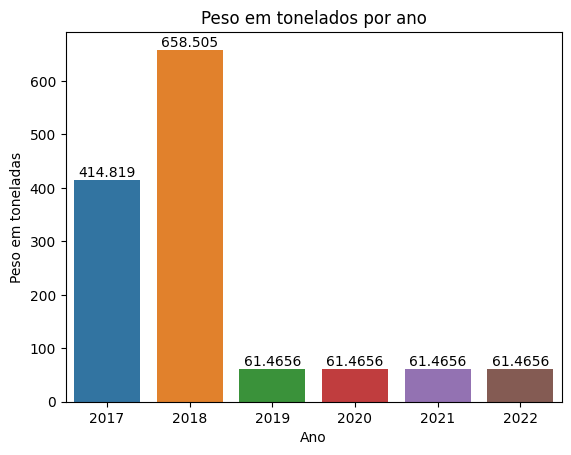

In [ ]:
grafico = sns.barplot(x= df_peso_ano.index, y=df_peso_ano['Peso_tons'],)

plt.title('Peso em tonelados por ano')

plt.ylabel('Peso em toneladas')

plt.xlabel('Ano')

grafico.bar_label(grafico.containers[0])

## 4. Qual é Total de Faturamento da Super Atacadista em todo o período?

In [ ]:
df_merge.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,2017-01-12,2017,Janeiro,1,12
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,2017-01-12,2017,Janeiro,1,12
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,2017-01-13,2017,Janeiro,1,13
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,2017-01-13,2017,Janeiro,1,13


In [ ]:
df_faturamento = df_merge.loc[:,['QtdItens','ValorUnitario','Ano']]

In [ ]:

df_faturamento['Total'] = df_faturamento.QtdItens * df_faturamento.ValorUnitario
df_faturamento.head()

,QtdItens,ValorUnitario,Ano,Total
0,6,8.83,2017,52.98
1,6,4.44,2017,26.64
2,10,0.96,2017,9.60
3,6,2.92,2017,17.52
4,6,2.81,2017,16.86


In [ ]:
df_faturamento = df_faturamento.loc[:, ['Ano', 'Total']]

In [ ]:
df_faturamento

,Ano,Total
0,2017,52.98
1,2017,26.64
2,2017,9.60
3,2017,17.52
4,2017,16.86
...,...,...
302835,2022,38.88
302836,2022,39.00
302837,2022,39.12
302838,2022,37.68


In [ ]:
df_faturamento = df_faturamento.groupby('Ano').sum()
df_faturamento

,Total
Ano,
2017,6648222.05
2018,10214809.43
2019,1046201.01
2020,1046201.01
2021,1046201.01
2022,1046201.01


In [ ]:
df_faturamento['Total em milhões'] = df_faturamento['Total']/1000000

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


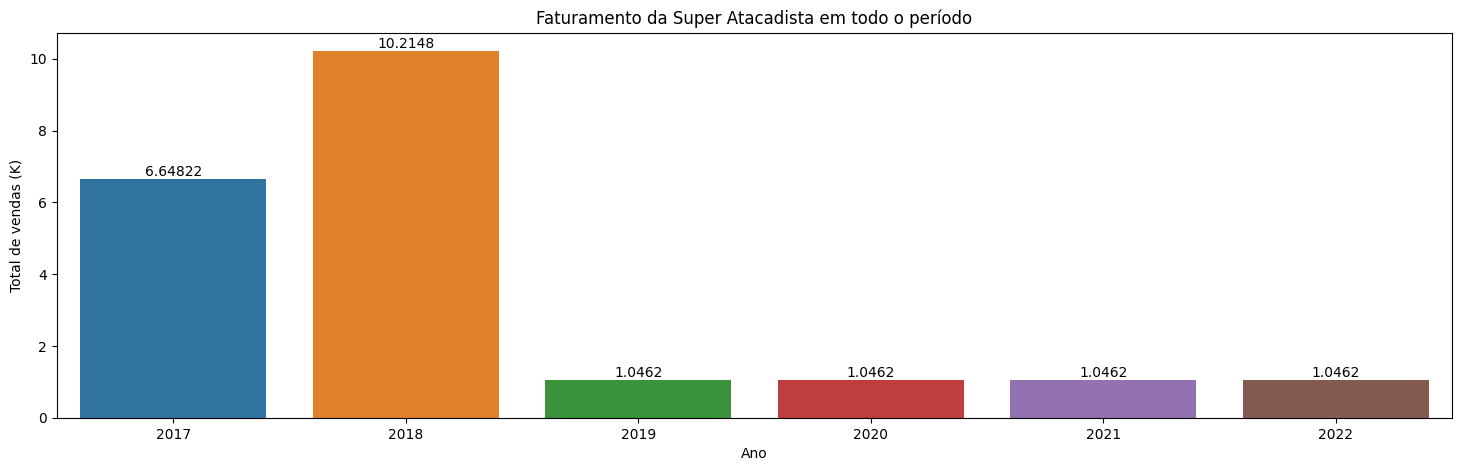

In [ ]:
grafico = sns.barplot(x= df_faturamento.index, y=df_faturamento['Total em milhões'],)

plt.title('Faturamento da Super Atacadista em todo o período')

plt.ylabel('Total de vendas (K)')

plt.xlabel('Ano')

grafico.bar_label(grafico.containers[0])
grafico.figure.set_size_inches(18, 5)

## 5. Qual foi a quantidade total de produtos vendidos em todo o período?

In [ ]:
df_merge.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,2017-01-12,2017,Janeiro,1,12
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,2017-01-12,2017,Janeiro,1,12
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,2017-01-13,2017,Janeiro,1,13
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,2017-01-13,2017,Janeiro,1,13


In [ ]:
df_quantidade_produtos = df_merge.loc[:,['QtdItens','Ano']]

In [ ]:
df_quantidade_produtos.head()

,QtdItens,Ano
0,6,2017
1,6,2017
2,10,2017
3,6,2017
4,6,2017


In [ ]:
df_quantidade_produtos = df_quantidade_produtos.groupby('Ano').sum()


In [ ]:
df_quantidade_produtos.head(10)

,QtdItens
Ano,
2017,2167345
2018,3864838
2019,348989
2020,348989
2021,348989
2022,348989


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


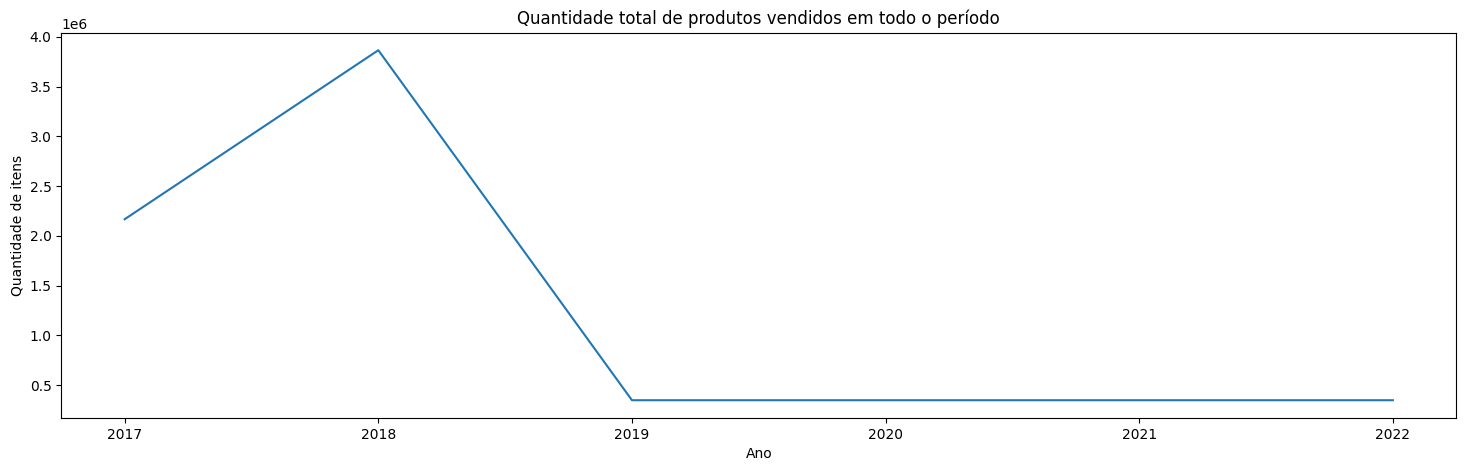

In [ ]:
grafico = sns.lineplot(data = df_quantidade_produtos, x = df_quantidade_produtos.index , y='QtdItens')

plt.title('Quantidade total de produtos vendidos em todo o período')

plt.ylabel('Quantidade de itens')

plt.xlabel('Ano')

#grafico.bar_label(grafico.containers[0])
grafico.figure.set_size_inches(18, 5)

## 6. Qual foi o total de peso em toneladas dos produtos vendidos em todo o período?

In [ ]:
dfProdutos

,cdProduto,Descrição,cdGrupo
0,1,Produto 1,9999
1,2,Produto 2,9999
2,3,Produto 3,9999
3,4,Produto 4,9999
4,5,Produto 5,9999
...,...,...,...
2731,2672,Produto 2672,113
2732,2673,Produto 2673,113
2733,2675,Produto 2675,105
2734,2678,Produto 2678,117


In [ ]:
df_merge.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,2017-01-12,2017,Janeiro,1,12
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,2017-01-12,2017,Janeiro,1,12
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,2017-01-13,2017,Janeiro,1,13
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,2017-01-13,2017,Janeiro,1,13


## 7. Quantos clientes ativos e inativos temos em nossa empresa?
(Crie um gráfico de rosca para mostrar estes totais)

In [ ]:
dfClientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cdCliente     1411 non-null   int64 
 1   Razão Social  1411 non-null   object
 2   Status        1411 non-null   object
 3   Categoria     1411 non-null   object
 4   Cidade        1411 non-null   object
 5   UF            1411 non-null   object
dtypes: int64(1), object(5)
memory usage: 66.3+ KB


In [ ]:
df_cliente_ativo_inativo = dfClientes.loc[:, ['cdCliente', 'Status']]
df_cliente_ativo_inativo

,cdCliente,Status
0,1339104,A
1,1339740,A
2,1339884,A
3,1340322,A
4,4837795,A
...,...,...
1406,5719211,A
1407,5736631,A
1408,5745024,A
1409,5806900,A


In [ ]:
df_cliente_ativo_inativo.replace(to_replace='A', value='Ativo', inplace=True)
df_cliente_ativo_inativo.replace(to_replace='I', value='Inativo', inplace=True)

In [ ]:
df_cliente_ativo_inativo = df_cliente_ativo_inativo.groupby('Status').count()
df_cliente_ativo_inativo.head()

,cdCliente
Status,
Ativo,1364
Inativo,47


In [ ]:
df_cliente_ativo_inativo.rename(columns={'cdCliente':'Quantidade'},inplace=True)

([<matplotlib.patches.Wedge at 0x1ffe5187990>,
 [Text(-1.0939826195114473, 0.11490007922918268, 'Ativo'),
  Text(1.093982623545592, -0.11490004081941627, 'Inativo')],
 [Text(-0.5967177924607893, 0.06267277048864509, '97%'),
  Text(0.596717794661232, -0.0626727495378634, '3%')])

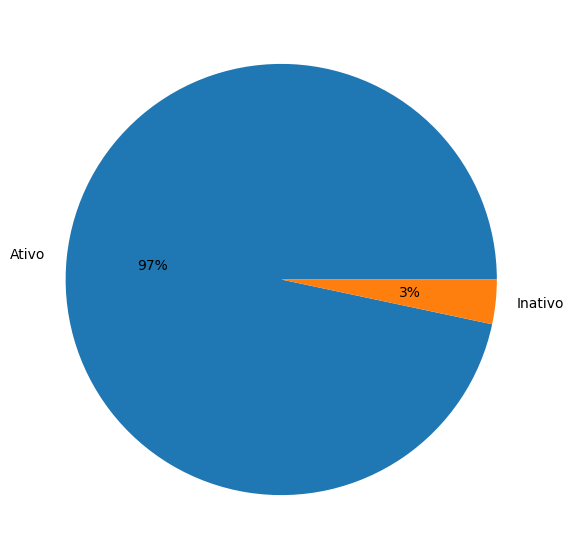

In [ ]:

fig = plt.figure(figsize=(10, 7))
plt.pie(df_cliente_ativo_inativo['Quantidade'], labels=df_cliente_ativo_inativo.index, autopct='%.0f%%')

## 8. Qual foi o ano com maior ticket médio dos produtos?
(
Ticket médio = Total faturado pela quantidade vendida)

In [ ]:
df_merge.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,2017-01-12,2017,Janeiro,1,12
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,2017-01-12,2017,Janeiro,1,12
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,2017-01-13,2017,Janeiro,1,13
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,2017-01-13,2017,Janeiro,1,13


In [ ]:
df_faturamento.head()

,Total,Total em milhões
Ano,,
2017,6648222.05,6.648222
2018,10214809.43,10.214809
2019,1046201.01,1.046201
2020,1046201.01,1.046201
2021,1046201.01,1.046201


In [ ]:
df_quantidade_produtos= df_merge.loc[:,['QtdItens','Ano']]

In [ ]:
df_quantidade_produtos = df_quantidade_produtos.groupby('Ano').count()

In [ ]:
df_quantidade_produtos

,QtdItens
Ano,
2017,91594
2018,154254
2019,14248
2020,14248
2021,14248
2022,14248


In [ ]:
df_quantidade_produtos_faturamento = df_faturamento.merge(df_quantidade_produtos,
                               left_on= df_faturamento.index,
                               right_on= df_quantidade_produtos.index,
                               how='left'
                               )


In [ ]:
df_quantidade_produtos_faturamento.head()

,key_0,Total,Total em milhões,QtdItens
0,2017,6648222.05,6.648222,91594
1,2018,10214809.43,10.214809,154254
2,2019,1046201.01,1.046201,14248
3,2020,1046201.01,1.046201,14248
4,2021,1046201.01,1.046201,14248


In [ ]:
df_quantidade_produtos_faturamento['Ticket médio'] = df_quantidade_produtos_faturamento['Total'] / df_quantidade_produtos_faturamento['QtdItens']

In [ ]:
df_quantidade_produtos_faturamento = df_quantidade_produtos_faturamento.set_index('key_0')

In [ ]:
df_quantidade_produtos_faturamento.head()

,Total,Total em milhões,QtdItens,Ticket médio
key_0,,,,
2017,6648222.05,6.648222,91594,72.583598
2018,10214809.43,10.214809,154254,66.220710
2019,1046201.01,1.046201,14248,73.427920
2020,1046201.01,1.046201,14248,73.427920
2021,1046201.01,1.046201,14248,73.427920


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


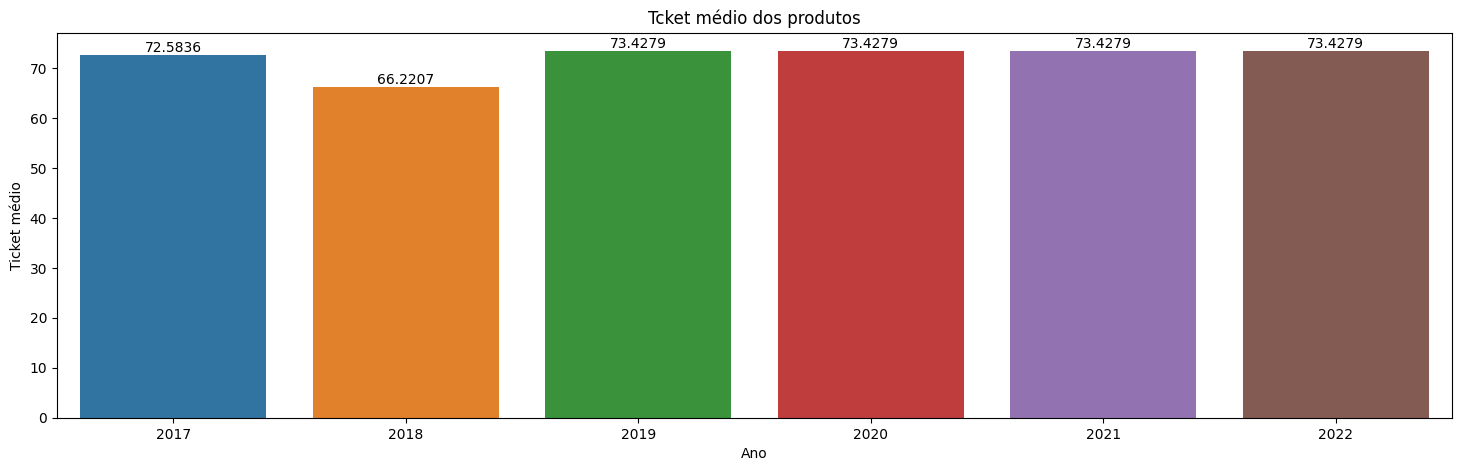

In [ ]:
grafico = sns.barplot(x= df_faturamento.index, y=df_quantidade_produtos_faturamento['Ticket médio'],)

plt.title('Tcket médio dos produtos')

plt.ylabel('Ticket médio')

plt.xlabel('Ano')

grafico.bar_label(grafico.containers[0])
grafico.figure.set_size_inches(18, 5)